In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# show all outputs of a cell (such as if df.head() and df.tail() are in the same cell
#default is 'last_expr'

In [2]:
import pickle
import numpy as np
import pandas as pd
from sklearn import *
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt

In [11]:
o = open('/Users/Work/Desktop/Work/Projects/Springboard/Final_Files/reviews_pickle.pkl','r')
starbucks=pickle.load(o)
starbucks=pd.DataFrame(starbucks)
o.close()

Y=starbucks.stars
f= lambda x: 1 if x>=3 else 0
#f= lambda x: 2 if x>=4 else 1 if x>=3 else 0 #if we wanted 3 categories
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split\
(starbucks.text, Y, test_size=0.30, random_state = 5)

df=pd.read_csv('/Users/Work/Desktop/Work/Projects/Datasets/Boston_Housing/boston_housing.csv')
df.columns=df.columns.str.lower() 

In [ ]:
'''
plot() parameters
linewidth or lw
linestyle or ls         ‘solid’ or |,  ‘dashed’, ‘dashdot’, ‘dotted’, '' (no line)
color     or c          {b : blue, g : green, r : red, c : cyan, m : magenta, y : yellow, 
                         k : black, w : white}      
color AND linestyle     'b-' solid blue, 'b--' dashed blue, 'b.-' dotted blue 
                        do not do color='b--'.  Just do(arg1,'b--',arg2)
marker                  {".": point, ",":pixel, "o": circle, "v": triangle_down, 
                        's':square, '*',star}    
markersize
'''

In [ ]:
'''
scatter() parameters
facecolors = 'None'     makes symbols empty (no filling)
'''

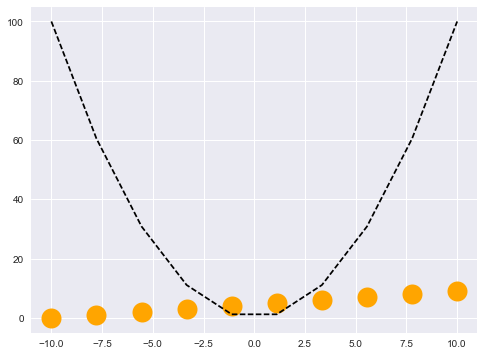

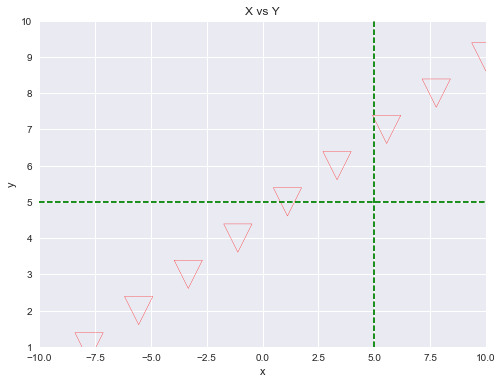

In [39]:
x=np.linspace(-10,10,10)  #(beg,end,n) --> returns n EVENLY SPACED values over interval
                          #includes end value.  This produces values 1-10
                       
y=np.arange(0,10,1)       #(beg,end,stepsize) - returns all integers in interval if step=1, 
                          #excluding the end value
y2=x**2
y3=x**3

from IPython.core.pylabtools import figsize
figsize(8,6)              #adjust figure size

plt.plot(x,y,linewidth=3,color='orange',linestyle='',marker='o',markersize=20) #emulate scatterplot via linestyle=' '
plt.plot(x,y2,'k--')       #plot makes lines by connecting points in the order they appear in the input seq
                       

plt.figure()    #creates a new plot so the previous plot isn't overwritten
plt.scatter(x,y,color='red', marker='v',s=800,facecolors='None') #scatter does not connect points, s = symbol size
plt.hlines(5,-10,10,color='g',linestyle='--')  
plt.vlines(5,1,10,color='green',linestyle='dashed')
plt.xlim(-10,10)
plt.ylim(1,10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('X vs Y')

plt.show();  #display all figures that occur before show statement

In [3]:
from bokeh.io import output_notebook, show
from bokeh.layouts import widgetbox
from bokeh.models.widgets import MultiSelect

output_notebook()
multi_select = MultiSelect(title="Option:", value=["foo", "quux"],
                           options=[("foo", "Foo"), ("bar", "BAR"), ("baz", "bAz"), ("quux", "quux")])
show(widgetbox(multi_select))

Loading BokehJS ...

In [30]:
from ipywidgets import interact
import numpy as np

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

x = np.linspace(0, 2*np.pi, 2000)
y = np.sin(x)

Loading BokehJS ...

In [31]:
p = figure(title="simple line example", plot_height=300, plot_width=600, y_range=(-5,5))
r = p.line(x, y, color="#2222aa", line_width=3)

In [35]:
def update(f, w=1, A=1, phi=0):   
    if f == "cos": func = np.cos
    elif   f == "sin": func = np.sin
    elif f == "tan": func = np.tan
    r.data_source.data['y'] = A * func(w * x + phi)
    push_notebook()

In [37]:
show(p, notebook_handle=True)

In [34]:
interact(update, f=['cos','sin', "tan"], w=(0,10), A=(1,10), phi=(0, 20, 0.1))


x= range of x values            
y=f(x)
p=figure(plot settings)                                   create plot
r=p.line(x,y, line settings)                              create line on plot
def update(f, w=1, A=1, phi=0):
    r.data_source.data['y'] = A * func(w * x + phi)       y=f(changeable parameters, x)
interact(update, a=(beg,end), str=['v1','v2'])                
    string values given individually as ['v1','v2','v3']
    numeric values given as a range (beg,end)


In [44]:
o = open('/Users/Work/Desktop/Work/Projects/Springboard/Final_Files/Starbucks_Y.pkl','r')
Y=pickle.load(o)
o.close()
o = open('/Users/Work/Desktop/Work/Projects/Springboard/Final_Files/Starbucks_X.pkl','r')
X=pickle.load(o)
o.close()

In [48]:
import pickle
from sklearn import 
from sklearn import tree
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np
import matplotlib.pyplot as plt

In [43]:
def plot_learning_curve(estimator, X, Y, title=None, ylim=None, cv=None,
                        train_sizes=None,scoring=None):

    #create train sizes, train scores, #test scores
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, Y, cv=cv,train_sizes=train_sizes,scoring=scoring)
    
    #create average scores for each train sizes
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    #plot average scores for each train size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
    
    
    p = figure(title="Learning Curve", plot_height=300, plot_width=600, y_range=(.25,.6))
    r1 = p.line(train_sizes, train_scores_mean, color="#2222aa", line_width=3)
    r2 = p.line(train_sizes, test_scores_mean, color="#2222aa", line_width=3)
    
    #plot aesthetics
    plt.grid()
    if ylim is not None:
        plt.ylim(*ylim) 
    plt.ylabel("Score")
    plt.xlabel("Training Examples")
    plt.title(title)
    plt.legend(loc="best")
    return plt

In [ ]:
def update(estimator):   
    if estimator == "Linear Regression": estimator = linear_model.LinearRegression()
    elif    estimator == "Decision Tree": estimator = tree.DecisionTreeRegressor()
    r.data_source.data['test_scores_mean'] \
    = estimator
    push_notebook()

In [53]:
%matplotlib inline
estimator=linear_model.LinearRegression()
cv=KFold(n_splits=5,shuffle=True,random_state=1)
score=make_scorer(mean_squared_error)
train_sizes=np.linspace(.1, 1.0, 5)

In [ ]:
plot_learning_curve(estimator=estimator,X=X,Y=Y,title='Learning Curve',\
                    train_sizes=train_sizes, cv=cv, scoring=score)

In [ ]:
p = figure(title="simple line example", plot_height=300, plot_width=600, y_range=(-5,5))
r = p.line(x, y, color="#2222aa", line_width=3)

In [46]:
from ipywidgets import interact
import numpy as np

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...